# Time Series Classification

Time Series Classification (TSC) involves training a model from a collection
 of time series (real valued, ordered, data) in order to predict a discrete target
 variable. For example, we might want to build a model that can predict whether a patient
 is sick based on their ECG reading, or a persons type of movement based on the trace
  of the position of their hand. This notebook gives a quick guide to TSC to get you
  started using aeon time series classifiers. If you can use scikit-learn, it should
   be easy, because the basic usage is identical.

<img src="https://github.com/sumana-2705/aeon/blob/main/examples/classification/img/tsc.png?raw=1" width="600" alt="time series classification">

## Classification Notebooks

This notebook gives an overview of TSC. More specific notebooks on TSC are based on
the type of representation or transformation they use:

- [Convolution based](convolution_based.ipynb)
- [Deep learning](deep_learning.ipynb)
- [Dictionary based](dictionary_based.ipynb)
- [Distance based](distance_based.ipynb)
- [Feature based](feature_based.ipynb)
- [Interval based](interval_based.ipynb)
- [Shapelet based](shapelet_based.ipynb)
- [Hybrid](hybrid.ipynb)
- [Early classification](early_classification.ipynb)


## Data Storage and Problem Types

Time series can be univariate (each observation is a single value) or multivariate
(each observation is a vector). For example, an ECG reading from a single
sensor is a univariate series, but a motion trace of from a smart watch would be
multivariate, with at least three dimensions (x,y,z co-ordinates). The image above is
 a univariate problem: each series has its own label. The dimension of the time
 series instance is also often called the channel. We recommend storing time series
 in 3D numpy array of shape `(n_cases, n_channels, n_timepoints)` and,
 where possible, our single problem loaders will return a
 3D numpy. Unequal length classification problems are stored in a list of 2D numpy
 arrays. More details on data storage can be found in the [data storage](../datasets/datasets.ipynb) notebook.

In [ ]:
# Plotting and data loading imports used in this notebook
import matplotlib.pyplot as plt

from aeon.datasets import load_arrow_head, load_basic_motions

arrow, arrow_labels = load_arrow_head(split="train")
motions, motions_labels = load_basic_motions(split="train")
print(f"ArrowHead series of type {type(arrow)} and shape {arrow.shape}")
print(f"Motions type {type(motions)} of shape {motions_labels.shape}")

ArrowHead series of type <class 'numpy.ndarray'> and shape (36, 1, 251)
Motions type <class 'numpy.ndarray'> of shape (40,)


We use 3D numpy even if the data is univariate: even though classifiers
can work using a 2D array of shape `(n_cases, n_timepoints)`, this 2D shape can get
confused with single multivariate time series, which are of shape `(n_channels, n_timepoints)`.
Hence, to differentiate both cases, we enforce the 3D format `(n_cases, n_channels,
n_timepoints)` to avoid any confusion.

If your series are unequal length, have missing values or are
  sampled at irregular time intervals, you should read the note book
  on [data preprocessing](../transformations/preprocessing.ipynb).

The [TSC dataset archive](https://timeseriesclassification.com/) contains a
large number of example TSC problems that have been used thousands of times in the
literature to assess TSC algorithms. These datasets have certain characteristics that
influence what data structure we use to store them in memory.

Most datasets in the archive contain time series all the same length. For example,
the [ArrowHead dataset](https://timeseriesclassification.com/description.php?Dataset=ArrowHead) we have just loaded consists of outlines of the images of
arrow heads. The classification of projectile points is an important topic in anthropology.

<img src="https://github.com/sumana-2705/aeon/blob/main/examples/classification/img/arrow-heads.png?raw=1" width="600" alt="arrow heads">

The shapes of the projectile points are converted into a sequence using the
angle-based method as described in this [blog post](https://izbicki.me/blog/converting-images-into-time-series-for-data-mining.html) about converting images into time series for data mining.

<img src="https://github.com/sumana-2705/aeon/blob/main/examples/classification/img/from-shapes-to-time-series.png?raw=1" width="600" alt="from shapes to time series">

Each instance consists of a single time series (i.e. the problem is univariate) of
equal length and a class label based on shape distinctions such as the presence and
location of a notch in the arrow. The data set consists of 210 instances, by default split into 36 train and 175 test instances.

The [BasicMotions dataset](https://timeseriesclassification.com/description.php?Dataset=BasicMotions) is an example of a multivariate TSC problem. It was generated
 as part of a project where four students performed four activities whilst wearing a
 smartwatch. The watch collects 3D accelerometer and 3D gyroscope data. Each instance
  involved a subject performing one of four tasks (walking, resting, running and
  badminton) for ten seconds. Time series in this data set have six dimensions or
  channels.

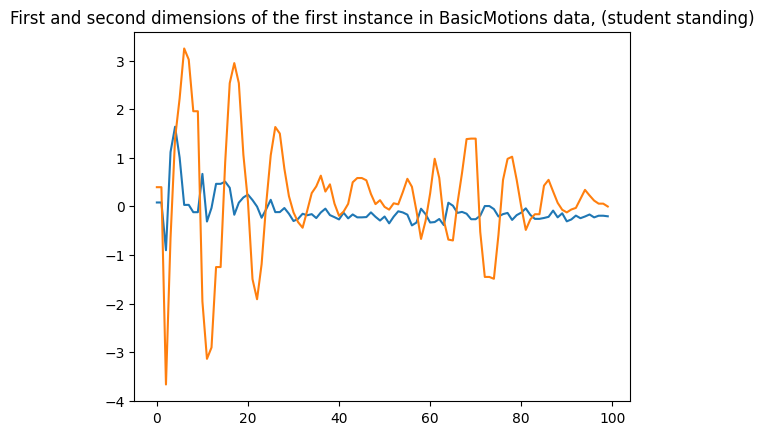

In [ ]:
plt.title(
    f"First and second dimensions of the first instance in BasicMotions data, "
    f"(student {motions_labels[0]})"
)
plt.plot(motions[0][0])
plt.plot(motions[0][1])

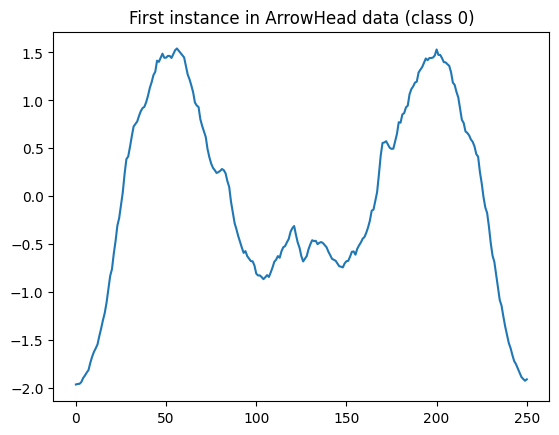

In [ ]:
plt.title(f"First instance in ArrowHead data (class {arrow_labels[0]})")
plt.plot(arrow[0, 0])

It is possible to use a standard `sklearn` classifier for univariate, equal length
classification problems, but it is unlikely to perform as well as bespoke time series
 classifiers, since `sklearn` classifiers ignore the sequence information in the variables.

To apply `sklearn` classifiers directly, the data needs to be reshaped into a 2D
numpy array. We also offer the ability to load univariate TSC problems directly in 2D
 arrays although we recommend using 3D numpy of shape `(n_channels, 1, n_timepoints)
 ` for univariate collections.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rand_forest = RandomForestClassifier(n_estimators=100)
arrow2d = arrow.squeeze()
arrow_test, arrow_test_labels = load_arrow_head(split="test", return_type="numpy2d")
rand_forest.fit(arrow2d, arrow_labels)
y_pred = rand_forest.predict(arrow_test)
accuracy_score(arrow_test_labels, y_pred)

0.72

## Time Series Classifiers in aeon

`aeon` contains the state of the art in time series classifiers in the package
`classification`. These are grouped based on the data representation used to find
discriminatory features. We provide a separate notebook for each of type:
[convolution based](convolution_based.ipynb), [deep learning](deep_learning.ipynb), [distance based](distance_based.ipynb), [dictionary based](dictionary_based.ipynb),
[feature_based](feature_based.ipynb), [hybrid](hybrid.ipynb), [interval based](interval_based.ipynb), and [shapelet based](shapelet_based.ipynb). We also
provide some
standard classifiers not available in scikit learn in the sklearn package.
We show the simplest use cases for classifiers and demonstrate how to build bespoke
pipelines for time series classification. An accurate and relatively
fast classifier is the [ROCKET](https://link.springer.com/article/10.1007/s10618-020-00701-z) classifier. ROCKET is a convolution based algorithm
described in detail in the [convolution based](convolution_based.ipynb) notebook.

In [ ]:
from aeon.classification.convolution_based import RocketClassifier

rocket = RocketClassifier(n_kernels=2000)
rocket.fit(arrow, arrow_labels)
y_pred = rocket.predict(arrow_test)

accuracy_score(arrow_test_labels, y_pred)

0.76

A slower but generally more accurate classifier for time series classification is
version 2 of the [HIVE-COTE](https://link.springer.com/article/10.1007/s10994-021-06057-9) algorithm.
(HC2) is described in the [hybrid notebook](hybrid.ipynb) notebook. HC2 is particularly
slow
on small problems like these examples. However, it can be
configured with an approximate maximum run time as follows (it may take a bit longer
than 12 seconds to run this cell, very short times are approximate since there is a
minimum amount of work the classifier needs to do):

In [ ]:
from aeon.classification.hybrid import HIVECOTEV2

hc2 = HIVECOTEV2(time_limit_in_minutes=0.2)
hc2.fit(arrow, arrow_labels)
y_pred = hc2.predict(arrow_test)

accuracy_score(arrow_test_labels, y_pred)

0.8685714285714285

The LITETime Classifier is an efficient deep learning-based model for time series classification. It is designed to handle both univariate and multivariate time series data effectively, offering lightweight architecture and competitive performance. For simplicity, this notebook uses 10 epochs to demonstrate the classifier's functionality. To observe the full performance of deep learning models in aeon, it’s recommended to use the library's default epochs. The reduced epochs here simplify the demonstration and reduce runtime. Deep learning approaches for time series classification, are further described in the [deep learning notebook](./deep_learning.ipynb).


In [ ]:
from aeon.classification.deep_learning import LITETimeClassifier

lite_time = LITETimeClassifier(n_epochs=10, batch_size=32, random_state=42)
lite_time.fit(arrow, arrow_labels)
y_pred = lite_time.predict(arrow_test)

accuracy_score(arrow_test_labels, y_pred)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step


0.3942857142857143

## Multivariate Classification
To use ``sklearn`` classifiers directly on multivariate data, one option is to flatten
the data so that the 3D array `(n_cases, n_channels, n_timepoints)` becomes a 2D array
of shape `(n_cases, n_channels*n_timepoints)`.

In [ ]:
motions_test, motions_test_labels = load_basic_motions(split="test")
motions2d = motions.reshape(motions.shape[0], motions.shape[1] * motions.shape[2])
motions2d_test = motions_test.reshape(
    motions_test.shape[0], motions_test.shape[1] * motions_test.shape[2]
)
rand_forest.fit(motions2d, motions_labels)
y_pred = rand_forest.predict(motions2d_test)
accuracy_score(motions_test_labels, y_pred)

0.925

However, many ``aeon`` classifiers, including ROCKET and HC2, are configured to
work with multivariate input. This works exactly like univariate classification. For example:

In [ ]:
rocket.fit(motions, motions_labels)
y_pred = rocket.predict(motions_test)
accuracy_score(motions_test_labels, y_pred)

1.0

A list of classifiers capable of handling multivariate classification can be obtained
 with this code

In [ ]:
from aeon.utils.discovery import all_estimators

all_estimators(
    tag_filter={"capability:multivariate": True},
    type_filter="classifier",
)

[('Arsenal', aeon.classification.convolution_based._arsenal.Arsenal),
 ('CanonicalIntervalForestClassifier',
  aeon.classification.interval_based._cif.CanonicalIntervalForestClassifier),
 ('Catch22Classifier',
  aeon.classification.feature_based._catch22.Catch22Classifier),
 ('ClassifierChannelEnsemble',
  aeon.classification.compose._channel_ensemble.ClassifierChannelEnsemble),
 ('DisjointCNNClassifier',
  aeon.classification.deep_learning._disjoint_cnn.DisjointCNNClassifier),
 ('DrCIFClassifier',
  aeon.classification.interval_based._drcif.DrCIFClassifier),
 ('DummyClassifier', aeon.classification.dummy.DummyClassifier),
 ('ElasticEnsemble',
  aeon.classification.distance_based._elastic_ensemble.ElasticEnsemble),
 ('EncoderClassifier',
  aeon.classification.deep_learning._encoder.EncoderClassifier),
 ('FCNClassifier', aeon.classification.deep_learning._fcn.FCNClassifier),
 ('FreshPRINCEClassifier',
  aeon.classification.feature_based._fresh_prince.FreshPRINCEClassifier),
 ('HIVECOTEV

An alternative for MTSC is to build a univariate classifier on each channel, then
ensemble. Channel ensembling can be easily done via ``ClassifierChannelEnsemble``
which fits classifiers independently to specified channels, then
combines predictions through a voting scheme. The example below builds a DrCIF
classifier on the first channel and a RocketClassifier on the fourth and fifth
dimensions, ignoring the second, third and sixth.

In [ ]:
from aeon.classification.compose import ClassifierChannelEnsemble
from aeon.classification.interval_based import DrCIFClassifier

cls = ClassifierChannelEnsemble(
    classifiers=[
        ("DrCIF0", DrCIFClassifier(n_estimators=5, n_intervals=2)),
        ("ROCKET3", RocketClassifier(n_kernels=1000)),
    ],
    channels=[[0], [3, 4]],
)

cls.fit(motions, motions_labels)
y_pred = cls.predict(motions_test)

accuracy_score(motions_test_labels, y_pred)

0.9

## sklearn Compatibility

`aeon` classifiers are compatible with `sklearn` model selection and
composition tools using `aeon` data formats. For example, cross-validation can
be performed using the `sklearn` `cross_val_score` and `KFold` functionality:

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

cross_val_score(rocket, arrow, y=arrow_labels, cv=KFold(n_splits=4))

array([0.88888889, 0.66666667, 0.77777778, 0.77777778])

Parameter tuning can be done using `sklearn` `GridSearchCV`. For example, we can tune
 the _k_ and distance measure for a K-NN classifier:

In [ ]:
from sklearn.model_selection import GridSearchCV

from aeon.classification.distance_based import KNeighborsTimeSeriesClassifier

knn = KNeighborsTimeSeriesClassifier()
param_grid = {"n_neighbors": [1, 5], "distance": ["euclidean", "dtw"]}
parameter_tuning_method = GridSearchCV(knn, param_grid, cv=KFold(n_splits=4))

parameter_tuning_method.fit(arrow, arrow_labels)
y_pred = parameter_tuning_method.predict(arrow_test)

accuracy_score(arrow_test_labels, y_pred)

0.8

Probability calibration is possible with the `sklearn` `CalibratedClassifierCV`:

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

from aeon.classification.interval_based import DrCIFClassifier

calibrated_drcif = CalibratedClassifierCV(
    estimator=DrCIFClassifier(n_estimators=10, n_intervals=5), cv=4
)

calibrated_drcif.fit(arrow, arrow_labels)
y_pred = calibrated_drcif.predict(arrow_test)

accuracy_score(arrow_test_labels, y_pred)

0.7485714285714286

### Background info and references for classifiers used here

#### KNeighborsTimeSeriesClassifier

One nearest neighbour (1-NN) classification with Dynamic Time Warping (DTW) is
a [distance based](distance_based.ipynb) classifier and one of the most frequently used
approaches, although it is less accurate on average than the state of the art.

#### RocketClassifier
The RocketClassifier is a [convolution based](convolution_based.ipynb) classifier
made up of a pipeline combination of the ROCKET transformation
 (transformations.panel.rocket) and the sklearn RidgeClassifierCV classifier. The RocketClassifier is configurable to use variants MiniRocket and MultiRocket. ROCKET is based on generating random convolutional kernels. A large number are generated, then a linear classifier is built on the output.

[1] Dempster, Angus, François Petitjean, and Geoffrey I. Webb. "Rocket: exceptionally fast and accurate time series classification using random convolutional kernels." Data Mining and Knowledge Discovery (2020)
[arXiv version](https://arxiv.org/abs/1910.13051)
[DAMI 2020](https://link.springer.com/article/10.1007/s10618-020-00701-z)

#### DrCIF
The Diverse Representation Canonical Interval Forest Classifier (DrCIF) is an
[interval based](interval_based.ipynb) classifier. The algorithm takes multiple
randomised intervals from each series and extracts a range of features. These features are used to build a decision tree, which in turn are ensembled into a decision tree forest, in the style of a random forest.

Original CIF classifier:
[2] Matthew Middlehurst and James Large and Anthony Bagnall. "The Canonical Interval Forest (CIF) Classifier for Time Series Classification." IEEE International Conference on Big Data (2020)
[arXiv version](https://arxiv.org/abs/2008.09172)
[IEEE BigData (2020)](https://ieeexplore.ieee.org/abstract/document/9378424?casa_token=8g_IG5MLJZ4AAAAA:ItxW0bY4eCRwfdV9kLvf-8a8X73UFCYUGU9D19PwrHigjivLJVchxHwkM3Btn7vvlOJ_0HiLRa3LCA)

The DrCIF adjustment was proposed in [3].

#### HIVE-COTE 2.0 (HC2)
The HIerarchical VotE Collective of Transformation-based Ensembles is a meta ensemble
 [hybrid](hybrid.ipynb) that combines classifiers built on different representations.
  Version 2  combines DrCIF, TDE, an ensemble of RocketClassifiers called the Arsenal and the  ShapeletTransformClassifier. It is one of the most accurate classifiers on the UCR and UEA time series archives.

[3] Middlehurst, Matthew, James Large, Michael Flynn, Jason Lines, Aaron Bostrom, and Anthony Bagnall. "HIVE-COTE 2.0: a new meta ensemble for time series classification." Machine Learning (2021)
[ML 2021](https://link.springer.com/article/10.1007/s10994-021-06057-9)

#### LITETime Classifier

The LITETimeClassifier, is a lightweight [deep learning model](https://github.com/aeon-toolkit/aeon/blob/main/examples/classification/deep_learning.ipynb). designed specifically for efficient and accurate time series classification (TSC). It leverages techniques like depthwise separable convolutions to minimize the number of parameters and computational overhead without compromising performance.

[4]  Ismail-Fawaz et al. LITE: Light Inception with boosTing tEchniques for Time Series Classification, IEEE International Conference on Data Science and Advanced Analytics, 2023 [LITE (pdf)](https://germain-forestier.info/publis/dsaa2023.pdf)

[5] Ismail-Fawaz, Ali, et al. “Look Into the LITE in Deep Learning for Time Series Classification.” arXiv preprint arXiv:2409.02869 (2024).arXiv preprint arXiv:2409.02869 [arXiv preprint](https://arxiv.org/abs/2409.02869)
